# K nearest neighbors (KNN)

In [2]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

# dataset creation

In [3]:
class DatasetGD():
    """
    if split_test_train == True:
        access data by "x_train", "y_train", "x_test", "y_test"
    else:
        access data by "x", "y"
    """
    def __init__(self, num_of_samples, mean, covariance, num_of_classes, 
                 shuffle=True, split_test_train=True, test_size=0.2):
        self.num_of_samples = num_of_samples
        self.mean = mean
        self.covariance = covariance
        self.num_of_classes = num_of_classes
        
        self.generate_dataset(num_of_samples, mean, covariance, num_of_classes)
        
        # split test train dataset
        if split_test_train == True:
            self.split(shuffle, test_size)   
            
    def split(self, shuffle, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=test_size, shuffle=shuffle)
     
    def generate_dataset(self, num_of_samples, mean, covariance, num_of_classes, seed=1000):
        x_data = []        
        y_data = []
        for i in range(self.num_of_classes):
            self.mvd = multivariate_normal(cov = covariance[i], mean = mean[i], seed = seed)
            
            # generating 500 samples out of the distribution
            x_tmp = self.mvd.rvs(size = num_of_samples)
            y_tmp = np.array([i]*self.num_of_samples)
        
            x_data.append(x_tmp)
            y_data.append(y_tmp)
        
        # concatenate all x_datas and y_datas
        self.x = list(x_data[0]) + list(x_data[1]) + list(x_data[2])
        self.y = list(y_data[0]) + list(y_data[1]) + list(y_data[2])
        self.x = np.array(self.x)
        self.y = np.array(self.y).reshape(-1, 1)
        
    def plot_dataset(self, x_in, y_in):
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        x_ = pd.DataFrame(data=x_in, columns=["x1", "x2"])
        y = pd.DataFrame(data=y_in, columns=["y"])

        res = pd.concat([x_, y], axis=1, sort=False)
        class_0 = res[res['y'] == 0]
        class_1 = res[res['y'] == 1]
        class_2 = res[res['y'] == 2]

        ax2.scatter(class_0.iloc[:,0], class_0.iloc[:, 1], s=10, label='class-0', c='#64B952')
        ax2.scatter(class_1.iloc[:,0], class_1.iloc[:, 1], s=10, label='class-1', c='#8678AC')
        ax2.scatter(class_2.iloc[:,0], class_2.iloc[:, 1], s=10, label='class-2', c='#FF5300')
        ax2.set_title("Dataset Scatter Plot")
    
    def calculate_cov(self, x, y, mean_MLE):
        self.n = len(self.covariance[0])
        list_cov = []
        for class_ in range(self.num_of_classes):
            cov_ = np.zeros((self.n, self.n))
            count_ = 0
            for i in range(x.shape[0]):
                if int(y[i]) == class_:
                    temp = x[i] - mean_MLE[int(y[i])].reshape(1,-1)
                    cov_ += np.dot(temp.T, temp)
                    count_ += 1
            cov_ /= count_
            list_cov.append(cov_)
        return list_cov
    
    def calculate_mean(self, x , y):
        self.n = len(self.covariance[0])
        mean_ = np.zeros((self.num_of_classes, self.n))
        for i in range(self.num_of_classes):
            mean_[i] = np.mean(x[np.argwhere(y == i)[:,0]], axis = 0)
        return mean_
    
    def plot_pdf(self, x_in, y_in):
        mean_MLE = self.calculate_mean(x_in, y_in)

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        fig2 = plt.figure()
        ax2 = fig2.gca()
        
        color = ['viridis' ,'plasma', 'cividis']
        
        sigma = self.calculate_cov(x_in , y_in , mean_MLE)
        
        for class_ in range(self.num_of_classes):
            meow = [mean_MLE[class_][0], mean_MLE[class_][1]]     # :)
            sigma_c = sigma[class_]
            
            x = np.linspace(meow[0] - 4 * sigma_c[0][0], meow[0] + 4 * sigma_c[0][0], 200).flatten()
            y = np.linspace(meow[1] - 4 * sigma_c[1][1], meow[1] + 4 * sigma_c[1][1], 200).flatten()

            X, Y = np.meshgrid(x,y)
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y

            rv = multivariate_normal(meow, sigma_c)

            # Make a 3D plot
            ax.plot_surface(X, Y, rv.pdf(pos), cmap=color[class_], linewidth=0)
            ax.set_title('3D PDF Plot')
            
            # Make true PDF contour
            ax2.contour(X, Y, rv.pdf(pos), cmap='inferno')
            ax2.set_title("PDF Plot")
        
            
        data_join = np.c_[x_in, y_in]
        df = pd.DataFrame(data_join, columns = ['x1','x2','y'])
        sns.jointplot(data=df, x="x1", y="x2", hue="y", kind="kde", multiple='stack').fig.suptitle("True PDF Plot")


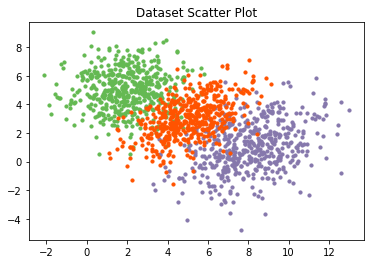

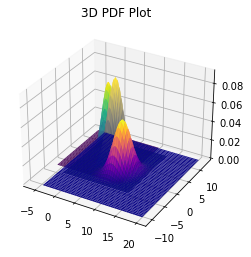

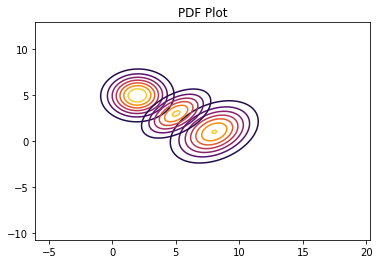

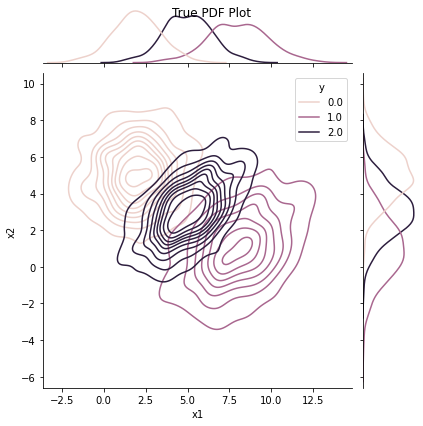

In [4]:

mean_1_class_1 = [2, 5]
covariance_1_class_1 = np.array([[2, 0], 
                                 [0, 2]])
mean_1_class_2 = [8, 1]
covariance_1_class_2 = np.array([[3, 1], 
                                 [1, 3]])
mean_1_class_3 = [5, 3]
covariance_1_class_3 = np.array([[2, 1], 
                                 [1, 2]])

mean_1 = []
mean_1.append(mean_1_class_1)
mean_1.append(mean_1_class_2)
mean_1.append(mean_1_class_3)

covariance_1 = []
covariance_1.append(covariance_1_class_1)
covariance_1.append(covariance_1_class_2)
covariance_1.append(covariance_1_class_3)
# ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.

dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=False)
dataset.plot_dataset(dataset.x, dataset.y)
dataset.plot_pdf(dataset.x, dataset.y)

In [5]:
class KNN():
    def __init__(self, x_train, k, distance_fn="eulicidan"):
        self.k = k
        
        self.x_train = x_train
        self.x1_train = x_train[:, 0]
        self.x2_train = x_train[:, 1]

        self.distance_fn = distance_fn
    
    def generate_meshgrid_data(self):
        # generate new x between min and max of dataset_x_train
        x = np.linspace(np.amin(self.x1_train), np.amax(self.x1_train), 50).reshape(-1, 1)
        y = np.linspace(np.amin(self.x2_train), np.amax(self.x2_train), 50).reshape(-1, 1)
        self.xx, self.yy = np.meshgrid(x, y)
        self.new_generated_x = np.concatenate([self.xx.ravel().reshape(-1, 1), self.yy.ravel().reshape(-1, 1)], axis=1)
    
    def find_distance(self, x, k):
        distances = np.array([np.linalg.norm(data_point - x) for data_point in self.x_train])
        return np.sort(distances)[k-1]
    
    def P_KNN(self):
        # generate new x-sample meshgrid
        self.generate_meshgrid_data()
        
        N = self.x_train.shape[1]
        probabilities = []

        for new_x in self.new_generated_x:
            v = math.pi * (self.find_distance(new_x, self.k)**2)
            if v == 0:
                probabilities.append(1)
            else:
                px = k/(N * v)
                probabilities.append(px)  

        return probabilities


## Creating dataset

In [6]:
mean_1_class_1 = [2, 5]
covariance_1_class_1 = np.array([[2, 0], 
                                 [0, 2]])
mean_1_class_2 = [8, 1]
covariance_1_class_2 = np.array([[3, 1], 
                                 [1, 3]])
mean_1_class_3 = [5, 3]
covariance_1_class_3 = np.array([[2, 1], 
                                 [1, 2]])

mean_1 = []
mean_1.append(mean_1_class_1)
mean_1.append(mean_1_class_2)
mean_1.append(mean_1_class_3)

covariance_1 = []
covariance_1.append(covariance_1_class_1)
covariance_1.append(covariance_1_class_2)
covariance_1.append(covariance_1_class_3)

dataset = DatasetGD(num_of_samples=500, mean=mean_1, covariance=covariance_1, num_of_classes=3, split_test_train=True, test_size=0.2)

dataset.x

array([[0.86232416, 5.45386575],
       [1.96396176, 5.9112115 ],
       [1.57460927, 5.5508002 ],
       ...,
       [2.16457226, 0.24769458],
       [4.89348743, 3.15949257],
       [4.61584427, 2.56676386]])

## KNN

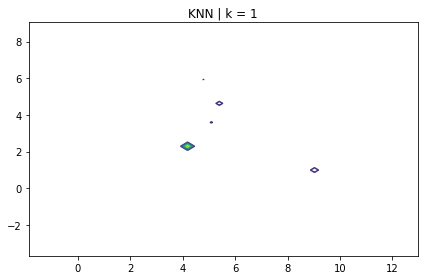

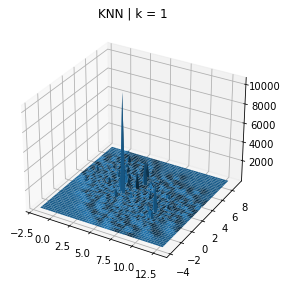

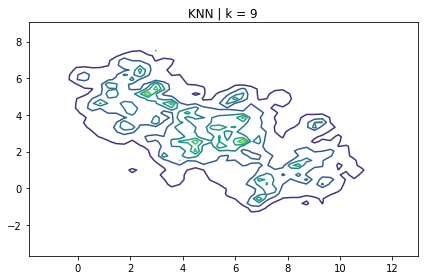

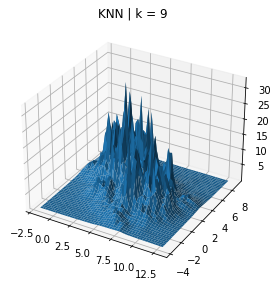

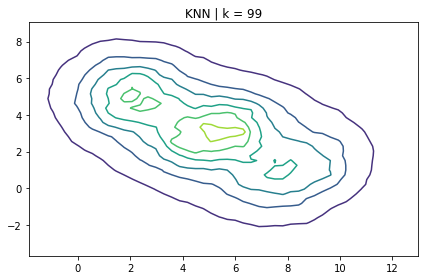

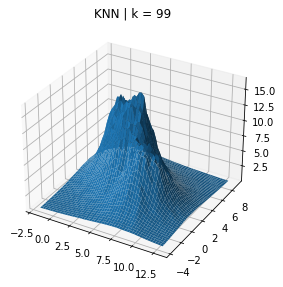

In [8]:
K = [1, 9, 99]

probability = []
for k in K:
    knn = KNN(dataset.x_train, k)
    probs = knn.P_KNN()
    zz = np.array(probs).reshape(knn.xx.shape)
    probability.append(zz)

for i in range(len(K)):
    fig, ax = plt.subplots(1)
    ax.contour(knn.xx, knn.yy, probability[i])
    ax.set_title('KNN | k = '+str(K[i]))
    fig.tight_layout()
    # ~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(knn.xx, knn.yy, probability[i])
    ax.set_title('KNN | k = '+str(K[i]))
    fig.tight_layout()